In [1]:
import xarray as xr
import matplotlib.pyplot as plt


# open an OPERA rain-rates file
fp1 = "/playpen-ssd/levi/w4c/w4c-25/weather4cast_data/w4c25/2019/OPERA/boxi_0015.train.rates.crop.h5"
ds = xr.open_dataset(fp1, cache=False)
data_array = ds['rates.crop']
print(data_array.shape)

(20308, 1, 252, 252)


/tmp/ipykernel_2785717/539768480.py:7: UserWarning: The 'phony_dims' kwarg now defaults to 'access'. Previously 'phony_dims=None' would raise an error. For full netcdf equivalence please use phony_dims='sort'.
  ds = xr.open_dataset(fp1, cache=False)


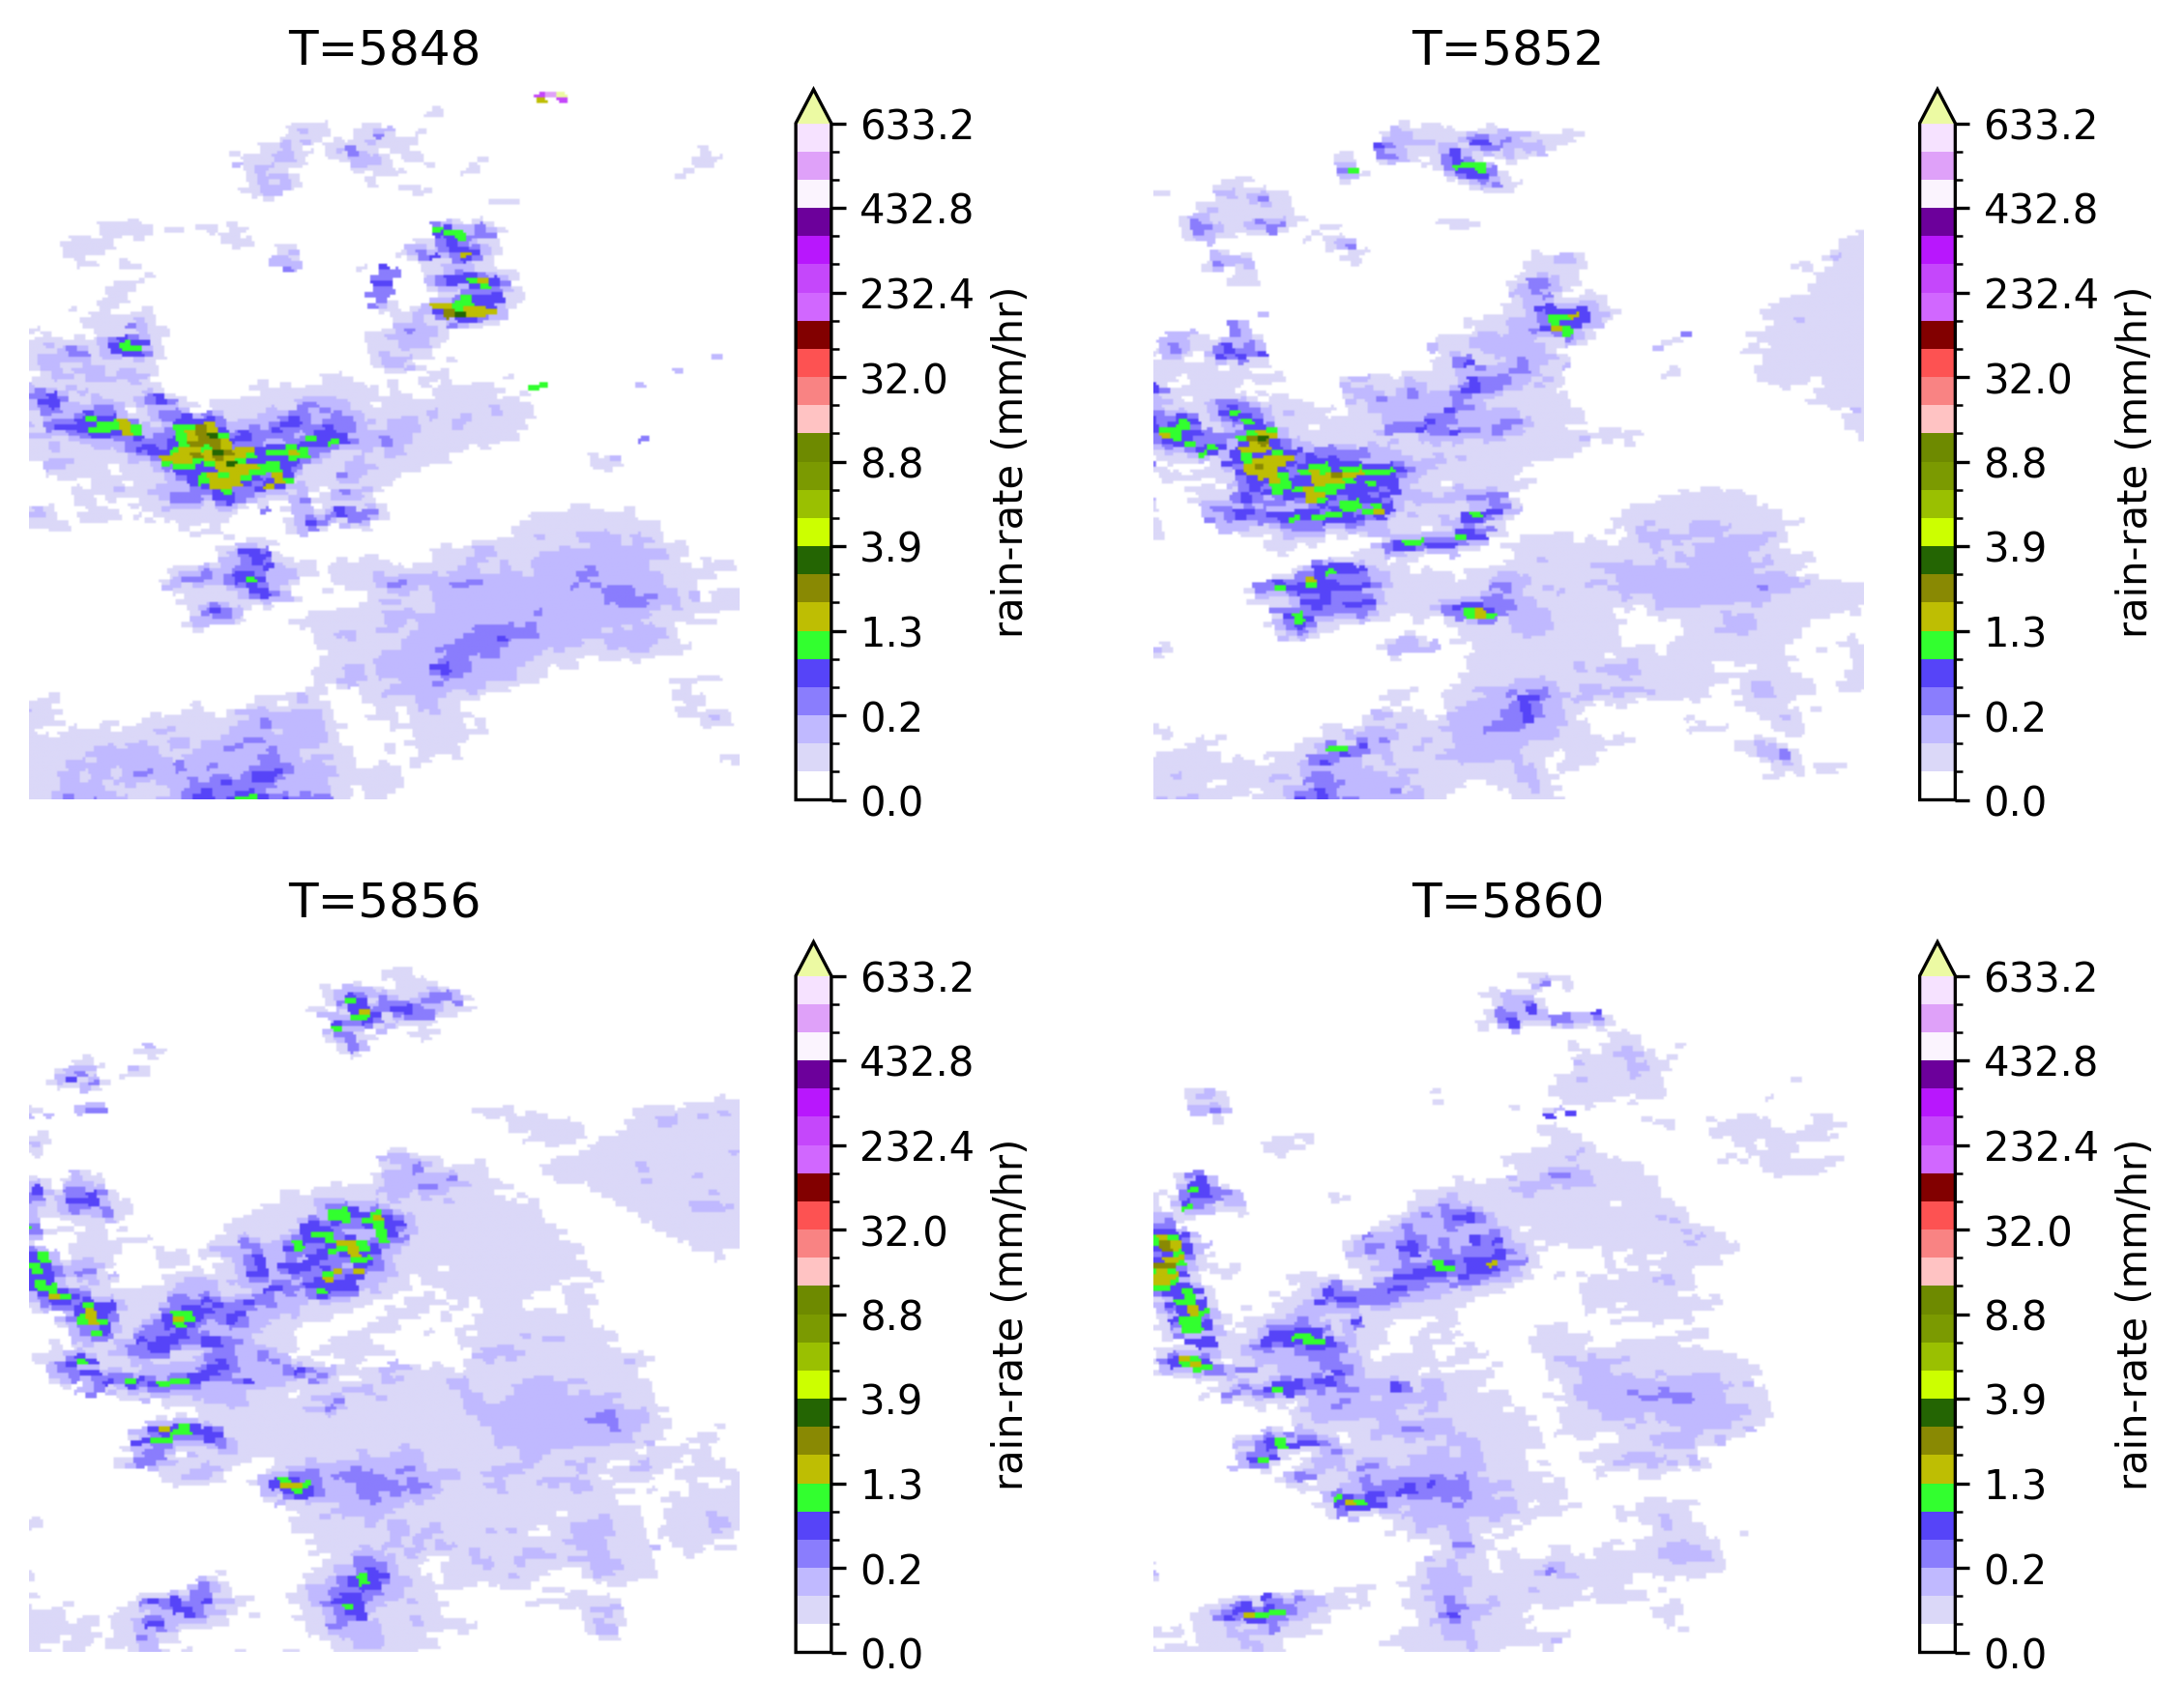

In [24]:
# immediately we can see that our datasets is extremely imbalanced
# vast majority of samples have max values close to 0, some samples have maximums of 700+
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

from src.util.plot.magic import OPERA_15M_QPE_PALLETE, OPERA_15M_QPE_BOUNDARIES


# pallete from NSSL MRMS web viewer
colors     = OPERA_15M_QPE_PALLETE
boundaries = OPERA_15M_QPE_BOUNDARIES


START_OPERA_IDX = 5848

cmap = mcolors.ListedColormap(colors)
cmap.set_bad((0, 0, 0, 0))
norm = mcolors.BoundaryNorm(boundaries, cmap.N, extend='max')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig = plt.figure(figsize=(10, 7), dpi=300)
gs  = fig.add_gridspec(nrows=2, ncols=2, width_ratios=[1, 1], wspace=0)

# top-left
ax1 = fig.add_subplot(gs[0, 0],) 
ax2 = fig.add_subplot(gs[0, 1],)
ax3 = fig.add_subplot(gs[1, 0],)
ax4 = fig.add_subplot(gs[1, 1],)

for i, ax in enumerate([ax1, ax2, ax3, ax4]):

    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.05)
    cbar.set_label("rain-rate (mm/hr)")

    offset = (i * 4)
    T = START_OPERA_IDX + offset

    # [252, 252]
    sli = data_array[T, ...].to_numpy().squeeze().clip(0)
    ax.imshow(
        sli,
        norm=norm,
        cmap=cmap,
    )
    ax.set_title(f"T={T}")
    ax.set_axis_off()

plt.show();

In [ ]:
import torch
from tqdm import tqdm


maxs = []
for i in tqdm(range(data_array.shape[0])):
    maxs.append(data_array[i, ...].max().clip(0))

In [ ]:
bins = plt.hist(maxs, log=True, bins=25)
plt.grid()
plt.show();

In [ ]:
list(float(x) for x in np.arange(32, 700, (700 - 32) / 10))

In [ ]:
import numpy as np


pcts = [np.percentile(np.array(maxs), int(i)) for i in np.arange(36, 100, (100 - 36) / 14)]

In [ ]:
[float(x) for x in pcts]

In [ ]:
(100 - 36) / 25

In [ ]:
np.arange(36, 100, 2.56)

In [ ]:
pcts

In [ ]:
# 32
np.percentile(np.array(maxs), 36)